<a href="https://colab.research.google.com/github/sayyed-uoft/sunlife/blob/main/SunLife_Vector_Institute_Fundamentals_of_Random_Forests_Workshop_(Dec_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Institute + Sun Life Financial Random Forest Case Study
## Sun Life Financial - Fundamentals of Random Forests

Welcome to ‘Fundamentals of Random Forests’ by Vector Institute!
This is a Python tutorial in the ‘Fundamentals of Random Forests’ 2-day workshop. 

This program was developed for the Sun Life Financial to give a mostly technical audience the opportunity to practice with Decision Tree and Random Forest models using 'sklearn' Python package using a real and relevant dataset.

Instructor: Sayyed Nezhadi | Assignment Developer: Sayyed Nezhadi | Course Director: Shingai Manjengwa (@Tjido)
Never stop learning!

### Assignment: Regression using Decision Tree and Random Forest models
Hello everyone and welcome to your assignment of the course "Sun Life - Fundamentals of Random Forests". In this assignment you are going to learn how to process data, build and train Decition Tree and Random Forest models to predict the cost, and hence severity, of insurance claims. 

## Data: Loading and Analysis
In this part of the code we will load the data, analyze it, and visulize it.

We are going to use a public dataset in [Kaggle](https://www.kaggle.com/c/allstate-claims-severity) from Allstate insurance company in USA. Thys are  currently developing automated methods of predicting the cost, and hence severity, of claims. Each row in this dataset represents an insurance claim. You must predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous 

There are 116 categorical variables and 14 continuous (real) variables. All the column names and categorical values are annonomized for provacy reasons.  

Data is provided in two splits of "train and "test". We will load only the "train" dataset because we are not planning to submit our model to Kaggle.




### Initializing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data 

Loading the training dataset from a Zip file online using "pandas":

In [3]:
data = pd.read_csv('https://github.com/sayyed-uoft/sunlife/raw/main/Allstate_Claims_Severity.zip', compression='zip')

### Analyzing training data

Let's take a quick look at the data. It is clearly annonomized. We won't be able to use any subject matter expertise to help with the feature engineering. 

In [4]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


Geting overall information:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


Checking is there is no missing information. Fortunately, the provided data is already clean.  

In [6]:
# number of missing data by column
data.isnull().sum(axis=0)

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [7]:
# Is ther any non-zero in that list?
data.isnull().sum(axis=0).any()

False

Let's look at the distribution of numerical/continous variables. Looks like they are already normalized to (0, 1) range. 

In [8]:
data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


Let's check how they are distributed. We could plot the distributions, but we skip that for this assignment. We can just look how skewed they are. The result shows all the columns are fairly symmetric except "loss", that is the output. 

In [9]:
data.skew()

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

Now, we can look at the distribution of "loss"" variable using Violin plot. It is very skewed and the range of numbers is very high too.

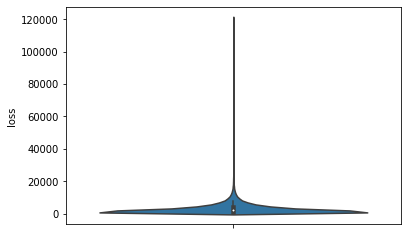

In [10]:
sns.violinplot(y='loss', data=data)
plt.show()

### Pre-process data

Let's first convert "id" to an index as this is not a feature:

In [11]:
data.set_index('id', inplace=True)
data.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


We saw the "loss" values are very skewed and has very large range of numbers. Let's convert it to logarithmic scale. We also had some noisy/very small data (e.g. loss = 0.67). Therefore, it is better to use log(1+x).

In [12]:
data.loss = np.log1p(data.loss)

Let's look at it again. Now looks symmetric. It will be better to use this as the response variable.

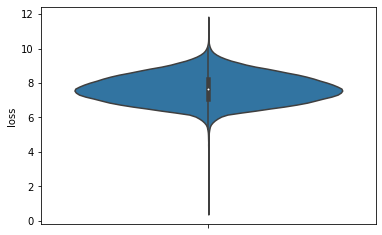

In [13]:
sns.violinplot(y='loss', data=data)
plt.show()

The "skew" metric is dropped significantly:

In [14]:
data.loss.skew()

0.09661958950315053


Now, we need to encode categorical columns into one-hot vectors. Let's first look at unique values for each column (only first 116 columns that are categorical)

In [15]:
data.iloc[:, :116].nunique().value_counts()

2      72
4      12
3       4
7       4
5       3
8       3
20      2
19      2
17      2
16      2
11      1
9       1
84      1
131     1
326     1
15      1
23      1
51      1
61      1
13      1
dtype: int64

Looks like most of the columns has 2 unique values. So, we won't craete a huge amount of columns We can convert to one-hot / dummy variables now (only "0"s and "1"s). We will choose to drop the first one to eliminate redundant data. For eaxmple, the columns with only two unique values will be converted to only one column. 

In [16]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,cat11_B,cat12_B,cat13_B,cat14_B,cat15_B,cat16_B,cat17_B,cat18_B,cat19_B,cat20_B,cat21_B,cat22_B,cat23_B,cat24_B,cat25_B,...,cat116_LU,cat116_LV,cat116_LW,cat116_LX,cat116_LY,cat116_M,cat116_MA,cat116_MB,cat116_MC,cat116_MD,cat116_ME,cat116_MF,cat116_MG,cat116_MH,cat116_MI,cat116_MJ,cat116_MK,cat116_ML,cat116_MM,cat116_MN,cat116_MO,cat116_MP,cat116_MQ,cat116_MR,cat116_MS,cat116_MT,cat116_MU,cat116_MV,cat116_MW,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,7.702637,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,7.158203,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,8.008396,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,6.846784,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,7.924742,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we have 1038 columns:

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 1 to 587633
Columns: 1038 entries, cont1 to cat116_Y
dtypes: float64(15), uint8(1023)
memory usage: 206.7 MB


Now, we need to do the following to be ready to train a model using "sklearn":

- Separate the features from labels


In [18]:
features = data.drop(['loss'], axis=1)
labels = data['loss']


- We need to split it to training and test (validation) sets for model evaluation. We keep 80% for training and 20% for test.

In [19]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=0)

In [20]:
print("Number of training smaples:", labels_train.shape[0])
print("Number of testing smaples:", labels_test.shape[0])

Number of training smaples: 150654
Number of testing smaples: 37664


## Training and Evaluation

We have prepared our data and are ready to train a model.

We will compare the following two models:

- Decistion Tree
- Random Forest

### Decision Tree:

Let's instantiate a Decision Tree model and train (fit) it with the training data. For now, we choose the default parameters without any restriction. 

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model 
model = DecisionTreeRegressor(random_state=0)
# Train the model
model.fit(features_train, labels_train)

DecisionTreeRegressor(random_state=0)

Below is the parameters used for this decision tree (default parameters):

In [22]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Now, we can use the trained model to predict the response variable for test smaples:

In [23]:
# Predict the test labels
preds = model.predict(features_test)
preds

array([6.97145282, 6.23421463, 8.18145189, ..., 7.60548196, 7.2775034 ,
       6.0069195 ])

To see how our model performs, we can use a Regression metric. One popular metric is MAE (Mean Absolute Error). Don't forget our model predicts the logarithm of "loss" (log(1+x)). We need to reverse it first using "expm1" function: 

In [25]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for test data
mean_absolute_error(np.expm1(labels_test), np.expm1(preds))

1717.4413325722176

Lets see what the error is for training data: 

In [26]:
# Calculate MAE for train data 
mean_absolute_error(np.expm1(labels_train), np.expm1(model.predict(features_train)))

0.0009829808700731457

Wow! That's almost zero! That maens a perfect fit. 


 


> **Question:**
> The error on the training data is very low but on the testing data is high. What is this sign of? Please explain.








The constructed tree is going to be very big and very deep. Let's limit the size of the tree by limiting it's depth to 3: 

In [27]:
# Create a new model with limited depth
model = DecisionTreeRegressor(max_depth=3, random_state=0)
# Train 
model.fit(features_train, labels_train)
# Predict test labels
preds = model.predict(features_test)
# MAE for test data
mean_absolute_error(np.expm1(labels_test), np.expm1(preds))

1446.4782540241424

Interestingly, the error got reduced even if we limited the tree. Let's check the error on training data. 

In [28]:
# Calculate MAE for train data 
mean_absolute_error(np.expm1(labels_train), np.expm1(model.predict(features_train)))

1445.1348896822035

> **Question:**
> The error on the test data is lower and the error on training data is comparable to that. Please explain why that happened? Is that good?


Let's plot this tree and look at the conditions. looks nice! :)

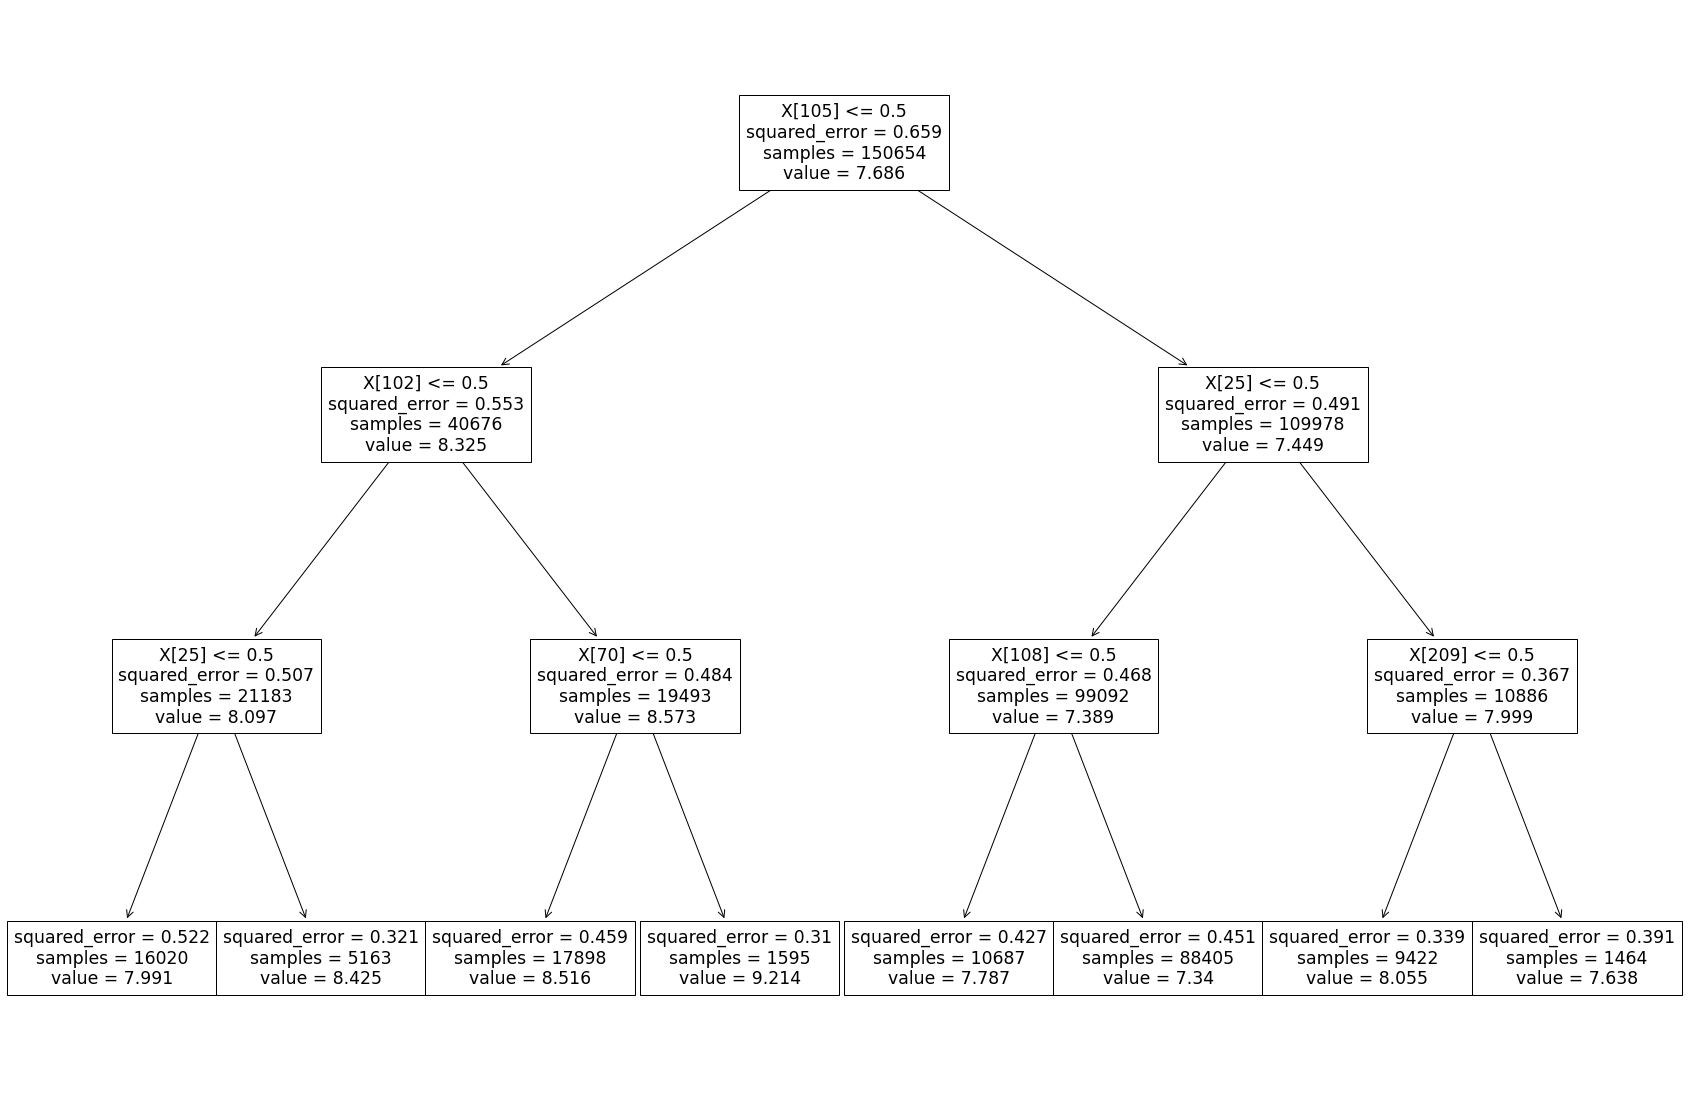

In [29]:
from sklearn import tree

plt.figure(figsize=(30, 20))
tree.plot_tree(model)
plt.show()

> **Task:** Try different tree depths and see if you can get even better results. Report the depth and the corresponding MAE. You can use Grid Search function from "sklearn" or you can try it manually  

### Random Forest:

Now, we will use a Random Forest model and train (fit) it with the training data. For now, we choose the default parameters with 50 estimators. 

**Note:** This may take a few minutes.

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(n_estimators=50, random_state=0)
# Train
model.fit(features_train, labels_train.values)
# Predict test labels
preds = model.predict(features_test)
# MAE 
mean_absolute_error(np.expm1(labels_test), np.expm1(preds))

1217.0103853622015

We got much better result! 

Let's look at MAE for training data:

In [41]:
# Calculate MAE for train data 
mean_absolute_error(np.expm1(labels_train), np.expm1(model.predict(features_train)))

497.09633056180326

It's not zero but much lower than test error. 

> **Task:** Play with different parameters and see if you can get a better result while avoiding overfitting.

Below are the paramaers we used for our model:

In [42]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

One great feature of Random Forest is that it will give you the importance of the features. Thsi is great for vfeature engineering and to speed up the training process.

In [43]:
# Importance scores sorted from high to low
np.sort(model.feature_importances_)[::-1]

array([0.19787681, 0.04860713, 0.0485065 , ..., 0.        , 0.        ,
       0.        ])

In [44]:
# Indices of top 10 important features
indices = np.argsort(model.feature_importances_)[-10:][::-1]
indices

array([105,  25,  13,   6, 103,   1, 102, 108,   7,   2])

In [45]:
# names of the top 10 important features (sorted)
cols = features.columns[indices]
cols

Index(['cat80_D', 'cat12_B', 'cont14', 'cont7', 'cat80_B', 'cont2', 'cat79_D',
       'cat81_D', 'cont8', 'cont3'],
      dtype='object')

We can plot the top 10 importane scores:

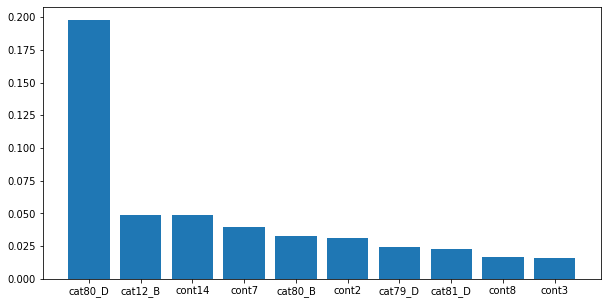

In [49]:
plt.figure(figsize=(10, 5))
plt.bar(x=cols, height=np.sort(model.feature_importances_)[-10:][::-1])
plt.show()

> **Question & Task:** What bare other ways to interpret the results of a Regression model? What other metrics or graphs you suggest? Can you calculate or plot for the result we got?

**Congratulations, you have completed a tutorial in the ‘Fundamentals of Random Forests’ program!**

Vector Institute & CRA | Course Director: Shingai Manjengwa (@Tjido) | Instructor: Sayyed Nezhadi  | Contact: learn@vectorinstitute.com
Never stop learning!